<a href="https://colab.research.google.com/github/AadityaAgarwal/DataVisualizationOfReminded/blob/main/DataVisualizationOfReminded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import plotly.express as px
import pandas as pd
import statistics
import csv,random
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
#importing modules

In [3]:
from google.colab import files
data_to_upload=files.upload()

df=pd.read_csv('GoogleColabData.csv')

fig=px.scatter(df,y='quant_saved',color="rem_any")
fig.show()


Saving GoogleColabData.csv to GoogleColabData.csv


In [4]:
with open("GoogleColabData.csv",newline='') as f:
  reader=csv.reader(f)
  savingData=list(reader)
savingData.pop(0) 
totalEntries=len(savingData)
rem_given=0

for data in savingData:
  if (int(data[3])==1):
    rem_given+=1

import plotly.graph_objects as go
fig=go.Figure(go.Bar(x=['reminded','not reminded'],y=[rem_given,(totalEntries-rem_given)]))
fig.show()

In [5]:
all_savings=[]

for data in savingData:
  all_savings.append(float(data[0]))
print("mean ",{statistics.mean(all_savings)})
print('mode ',{statistics.mode(all_savings)})
print('median ',{statistics.median(all_savings)})

mean  {85.32780331328739}
mode  {0.0}
median  {39.2724}


Mean,Median,Mode of people reminded and not reminded

In [6]:
remindedSavings=[]
notRemindedSavings=[]

for data in savingData:
  if(int(data[3])==1):
    remindedSavings.append(float(data[0]))
  else:
    notRemindedSavings.append(float(data[0]))

print(f"Mean of reminded savings- {statistics.mean(remindedSavings)}")
print(f"Median - {statistics.median(remindedSavings)}")
print(f"Mode - {statistics.mode(remindedSavings)}")
print(f"SD - {statistics.stdev(remindedSavings)}")

print(f"Mean of not reminded savings- {statistics.mean(notRemindedSavings)}")
print(f"Median - {statistics.median(notRemindedSavings)}")
print(f"Mode - {statistics.mode(notRemindedSavings)}")
print(f"SD - {statistics.stdev(notRemindedSavings)}")

print(f"SDPopulation - {statistics.stdev(all_savings)}")

Mean of reminded savings- 82.56940908263547
Median - 39.2724
Mode - 0.0
SD - 173.24866414440817
Mean of not reminded savings- 89.67095185226523
Median - 36.0475
Mode - 0.0
SD - 228.875050299707
SDPopulation - 196.75453011909315


Check whether quantity saved is corellated with age of people

```
`# This is formatted as code`
```



In [7]:
age=[]
savings=[]

for data in savingData:
  if(float(data[5])!=0):
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation=np.corrcoef(age,savings)
print(f"corellation= {correlation[0,1]}")

corellation= 0.03663447975985462


creating plots based on quantity saved 

In [ ]:
import plotly.figure_factory as ff

fig=ff.create_distplot([df['quant_saved'].tolist()],["savings"],show_hist=False)
fig.show()

analyzing outliers

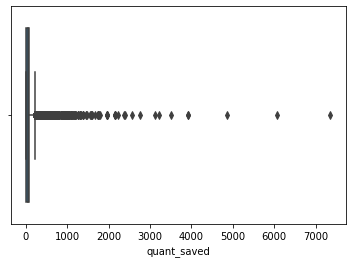

In [8]:
import seaborn as sns
sns.boxplot(data=df,x=df['quant_saved'])


removing outlier


In [9]:
q1=df['quant_saved'].quantile(0.25)
q3=df['quant_saved'].quantile(0.75)

iqr=q3-q1
# print(q1,q3,iqr)

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr
print(lower_whisker,upper_whisker)

newDf=df[df['quant_saved']<upper_whisker]


-124.06099999999998 212.85899999999998


mean,median,mode without ouliers

In [12]:
newDfList=list(newDf['quant_saved'])
print(f"Mean of newData- {statistics.mean(newDfList)}")
print(f"Median - {statistics.median(newDfList)}")
print(f"Mode - {statistics.mode(newDfList)}")
print(f"SD - {statistics.stdev(newDfList)}")

fig=ff.create_distplot([newDfList],["savings"],show_hist=False)
fig.show()

Mean of newData- 46.200519389818794
Median - 36.0475
Mode - 0.0
SD - 50.866871917288634


collecting samples from newDf of 1000samples of 100data points

In [13]:
sampleMeanList=[]
for i in range(0,1000):
  tempList=[]
  for z in range(0,100):
    tempList.append(random.choice(newDfList))
  sampleMeanList.append(statistics.mean(tempList))

meanOfSampleList=statistics.mean(sampleMeanList)

fig=ff.create_distplot([sampleMeanList],["samples"],show_hist=False)
fig.add_trace(go.Scatter(x=[meanOfSampleList,meanOfSampleList],y=[0,0.1],mode="lines",name="means"))
fig.show()



Standaard Deviation of the sample list


In [14]:
SD=statistics.stdev(sampleMeanList)
mean=statistics.mean(sampleMeanList)
print(SD,mean)

5.047030579520472 46.51021448120128


Corelation betwween age and quant_saved for data without out liers

In [15]:
tempDf=newDf[newDf.age!=0]
age=tempDf['age'].tolist()
savings=tempDf['quant_saved'].tolist()
correlation=np.corrcoef(age,savings)
print(f"corellation= {correlation[0,1]}")

corellation= 0.08561544120342093


finding z_test

In [16]:
rem_df=newDf.loc[newDf['rem_any']==1]
notRem_df=newDf.loc[newDf['rem_any']==0]
print(rem_df.head())
print(notRem_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


distribution graph for non reminded people and checking normal distribution

In [17]:
fig=ff.create_distplot([notRem_df['quant_saved'].tolist()],["not reminded"],show_hist=False)
fig.show()

sample distribution of not reminded

In [24]:
notRemindedSavings=notRem_df['quant_saved'].tolist()
sampleMeanListOfNotReminded=[]
for i in range(0,1000):
  tempList=[]
  for z in range(0,100):
    tempList.append(random.choice(notRemindedSavings))
  sampleMeanListOfNotReminded.append(statistics.mean(tempList))

meanOfSampleListOfNotReminded=statistics.mean(sampleMeanListOfNotReminded)
stdevNotReminded=statistics.stdev(sampleMeanListOfNotReminded)
print(stdevNotReminded)

fig=ff.create_distplot([sampleMeanList],["samples"],show_hist=False)
fig.add_trace(go.Scatter(x=[meanOfSampleListOfNotReminded,meanOfSampleListOfNotReminded],y=[0,0.1],mode="lines",name="means"))
fig.show()

5.091020096171261


data lying between 1st and 2nd SD of not reminded 

In [25]:
firstSdNotRemindedStart,firstSdNotRemindedEnd=meanOfSampleListOfNotReminded-stdevNotReminded,meanOfSampleListOfNotReminded+stdevNotReminded
SecondSdNotRemindedStart,SecondSdNotRemindedEnd=meanOfSampleListOfNotReminded-(2*stdevNotReminded),meanOfSampleListOfNotReminded+(2*stdevNotReminded)
ThirdSdNotRemindedStart,ThirdSdNotRemindedEnd=meanOfSampleListOfNotReminded-(3*stdevNotReminded),meanOfSampleListOfNotReminded+(3*stdevNotReminded)

print("First SD start and end ",firstSdNotRemindedStart,firstSdNotRemindedEnd)
print("Second SD start and end ",SecondSdNotRemindedStart,SecondSdNotRemindedEnd)
print("Third SD start and end ",ThirdSdNotRemindedStart,ThirdSdNotRemindedEnd)

First SD start and end  38.631573443174766 48.81361363551729
Second SD start and end  33.54055334700351 53.90463373168855
Third SD start and end  28.449533250832246 58.99565382785981


Sample Distribution of reminded

In [26]:
RemindedSavings=rem_df['quant_saved'].tolist()
sampleMeanListOfReminded=[]
for i in range(0,1000):
  tempList=[]
  for z in range(0,100):
    tempList.append(random.choice(RemindedSavings))
  sampleMeanListOfReminded.append(statistics.mean(tempList))

meanOfSampleListOfReminded=statistics.mean(sampleMeanListOfReminded)
stdevReminded=statistics.stdev(sampleMeanListOfReminded)
print(stdevReminded)

fig=ff.create_distplot([sampleMeanList],["samples"],show_hist=False)
fig.add_trace(go.Scatter(x=[meanOfSampleListOfReminded,meanOfSampleListOfReminded],y=[0,0.1],mode="lines",name="means"))
fig.show()

5.258937972353338


z_score=(meanOfSampleReminded-meanOfSampleNotReminded)/stdevOfNotReminded

In [30]:
print(f"Z-Score={(meanOfSampleListOfReminded-meanOfSampleListOfNotReminded)/stdevNotReminded}")

Z-Score=0.7925508018215826


Observations and conclusion: 

* Number of people reminded were more than number of people not reminded
* The mode of the data of "quant_saved" results to be 0.0 which means most of the people havent done savings.
* The number of people reminded are more yet the number of people who have done savings are less than those who havent thus showing that **inspite of being reminded many people have not done savings**
* There is **no corellation** between age and savings showing that people of all ages have and have not done savings
* Although the entire data is not normally distributed but when samples of data of reminded and not reminded are taken it shows that both the datasets **differently** are normally distributed.
---
Conclusion: ***The above datasets clearly show that reminding had no effect on 
the people***